In [1]:
# Dependencies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

## Loading the Images

In [2]:
waste_pic = 'F:\Miley\Data Analyst\Project\Waste-Management-\DATASET'

In [5]:
train_path = 'F:\Miley\Data Analyst\Project\Waste-Management-\DATASET/TRAIN'
test_path = 'F:\Miley\Data Analyst\Project\Waste-Management-\DATASET/TEST'



In [6]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████████████████████████████████████████████████| 9999/9999 [00:08<00:00, 1215.89it/s]


## Data Pre - Processing 

In [7]:
data.shape

(22564, 2)

In [8]:
from collections import Counter
Counter(y_data)

Counter({'TRAIN\\O': 12565, 'TRAIN\\R': 9999})

In [9]:
os.listdir(train_path)

['O', 'R']

In [10]:
os.listdir(test_path)

['O', 'R']

## Count of the images 

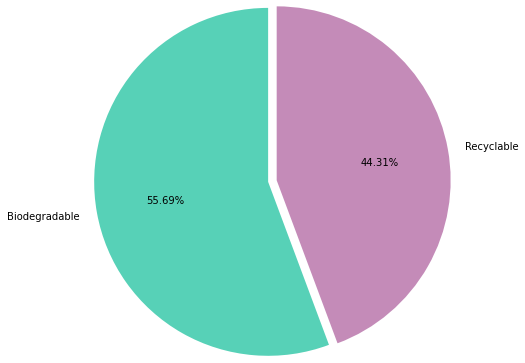

In [11]:
colors = ['#57d1b7','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Biodegradable', 'Recyclable'], colors= colors,radius=2)
plt.show()

## Random select the image from dataset 

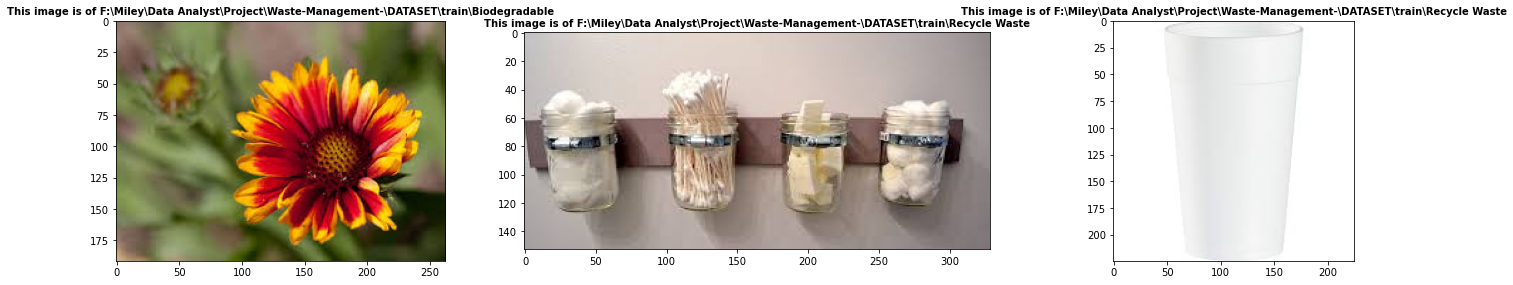

In [11]:
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(20000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':10,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

## Preparing data for the Model

In [12]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

## Training the Model
A training model is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output. 
The result from this correlation is used to modify the model.

In [15]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 3719 images belonging to 2 classes.


In [17]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=5,
        validation_data = test_generator)

Epoch 1/5
89/89 [==============================] - 858s 10s/step - loss: 0.5059 - accuracy: 0.7806 - val_loss: 0.3505 - val_accuracy: 0.8626
Epoch 2/5
89/89 [==============================] - 833s 9s/step - loss: 0.4097 - accuracy: 0.8294 - val_loss: 0.4155 - val_accuracy: 0.8056
Epoch 3/5
89/89 [==============================] - 838s 9s/step - loss: 0.3691 - accuracy: 0.8498 - val_loss: 0.2932 - val_accuracy: 0.8814
Epoch 4/5
89/89 [==============================] - 891s 10s/step - loss: 0.3382 - accuracy: 0.8655 - val_loss: 0.3148 - val_accuracy: 0.8774
Epoch 5/5
89/89 [==============================] - 858s 10s/step - loss: 0.3100 - accuracy: 0.8757 - val_loss: 0.2818 - val_accuracy: 0.8828


## Evaluating the Model

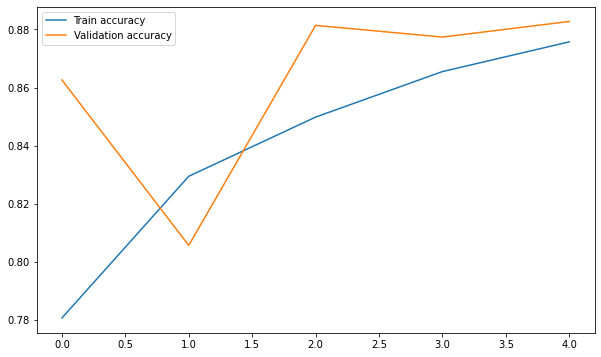

In [18]:
#val_acc is the accuracy computed on the validation set (data that have never been 'seen' by the model).
#batch size for testing is exactly the same concept as training batch size,usually cannot load all the testing data into memorym. 
#If you do not specify a batch, the training batch size will be used for testing too.
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

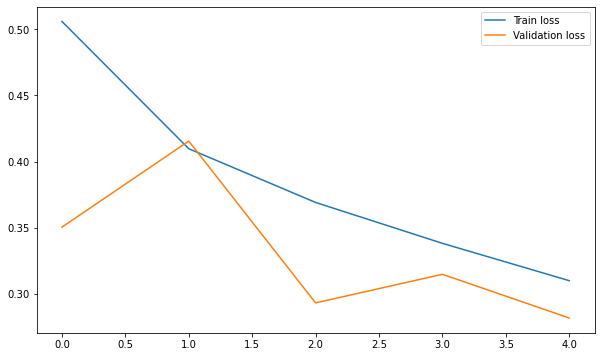

In [19]:
#loss is the error evaluated during training a model, val_loss is the error during validation. 
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Predicting on an Image

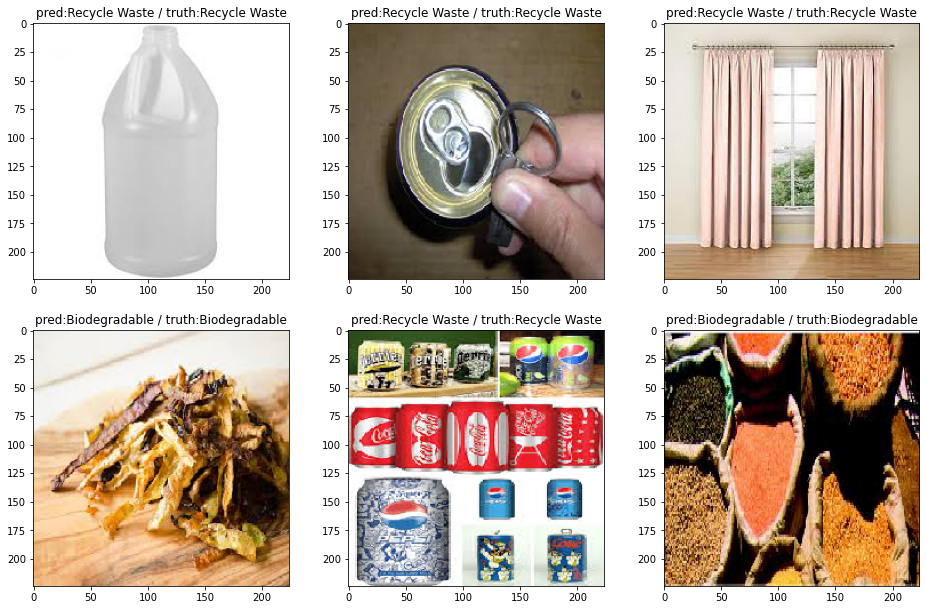

In [20]:
test_x, test_y = test_generator.__getitem__(1)

labels = (test_generator.class_indices)
labels = dict((r,b) for b,r in labels.items())

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])


In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
model.evaluate_generator(train_generator)

[0.27908089756965637, 0.8856585621833801]

In [23]:
model.evaluate_generator(test_generator)

[0.28183889389038086, 0.8827641606330872]

In [24]:
pred_probabilities = model.predict_generator(train_generator)


In [25]:
pred_probabilities

array([[0.02383626, 0.9772078 ],
       [0.9662562 , 0.02964345],
       [0.9461831 , 0.06277883],
       ...,
       [0.31359425, 0.6898564 ],
       [0.3003589 , 0.7110187 ],
       [0.8084334 , 0.18959466]], dtype=float32)

In [26]:
probabilities = model.predict_generator(test_generator)


In [27]:
probabilities

array([[0.99880457, 0.00128409],
       [0.1731619 , 0.8376726 ],
       [0.9974146 , 0.00254843],
       ...,
       [0.9162225 , 0.08322072],
       [0.39654565, 0.6140518 ],
       [0.99500895, 0.00497895]], dtype=float32)

In [28]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
predictions = pred_probabilities > 0.5
predictions

array([[False,  True],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [ True, False]])

## Save the model in json and h5

In [30]:
# Saving the model for Future Inferences

from tensorflow.keras.models import load_model
# serialize weights to HDF5
model.save_weights("model.h5")
